In [8]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
Mp = 1.e-8
Nout = 1000
J2 = 1.e-4
times = np.logspace(0, 6, Nout)
dtOverT = 0.01

def makesim(J2=None):
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=Mp, P=1., e=0.1)
    sim.add(m=Mp, P=2.3, e=0.1)
    sim.move_to_com()
    sim.integrator="whfast"
    sim.dt = dtOverT*sim.particles[1].P

    if J2:
        rebx = reboundx.Extras(sim)
        gh = rebx.add("gravitational_harmonics")
        ps = sim.particles
        ps[0].params['J2'] = J2
        ps[0].params['R_eq'] = ps[1].a

    try:
        return sim, rebx, gh
    except:
        return sim

In [10]:
sim, rebx, gh = makesim(J2=J2)

In [11]:
a = np.zeros(1000)
for i in range(1000):
    sim.step()
    a[i] = sim.particles[1].ax

In [12]:
np.max(a[i])/(sim.G*sim.particles[0].m/sim.particles[1].a**2)

-0.00022858382348004685

In [13]:
%%time

sim = makesim()
E0 = sim.calculate_energy()
Es = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy()
    Es[i] = np.abs((E-E0)/E0)
    
sim, rebx, gh = makesim(J2=J2)
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2 = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2[i] = np.abs((E-E0)/E0)
        
sim, rebx, gh = makesim(J2=J2)
sim.integrator="ias15"
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2IAS15 = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2IAS15[i] = np.abs((E-E0)/E0)
    
sim, rebx, gh = makesim(J2=J2)
sim.integrator="ias15"
gh.force_as_operator=1
gh.operator_order=2
sim.ri_ias15.epsilon=0

E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2IAS15Split = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2IAS15Split[i] = np.abs((E-E0)/E0)

CPU times: user 51min 28s, sys: 0 ns, total: 51min 28s
Wall time: 51min 30s


In [16]:
times = np.logspace(0, 4, Nout)

sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1.)
sim.add(m=Mp, P=1., e=0.1)
sim.add(m=Mp, P=2.3, e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = dtOverT*sim.particles[1].P

rebx = reboundx.Extras(sim)
ps = sim.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a

E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
EsJ2none = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2none[i] = np.abs((E-E0)/E0)

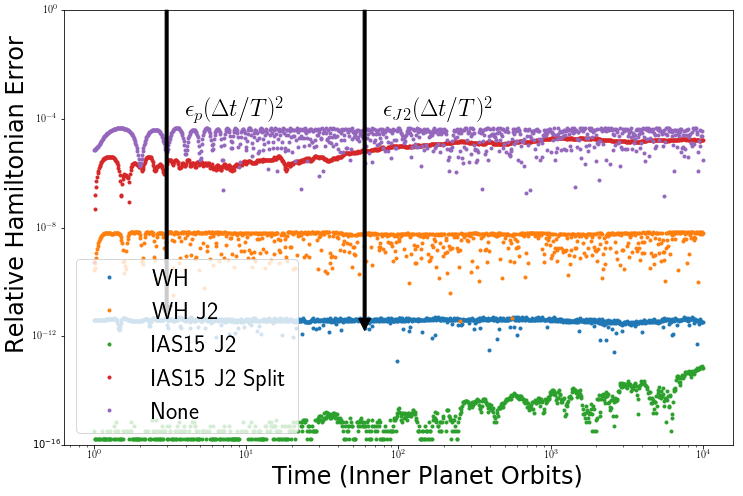

In [17]:
epsilon_p = 1.e-8
epsilon_J2 = 1.e-4
dtOverT = 0.01

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(times, Es, '.', label='WH')
ax.plot(times, EsJ2, '.', label='WH J2')
ax.plot(times, EsJ2IAS15, '.', label='IAS15 J2')
ax.plot(times, EsJ2IAS15Split, '.', label='IAS15 J2 Split')
ax.plot(times, EsJ2none, '.', label='None')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.])

plt.rcParams["text.usetex"] =True
plt.locator_params(axis='y', numticks=5)
ax.annotate(s='', xy=(60, np.pi**2/6.*epsilon_p*dtOverT**2), xytext=(60, 1), arrowprops=dict(width=3, facecolor='black'))
ax.text(4, 1.e-4, r'$\epsilon_{p}(\Delta t/T)^2$', fontsize=24)

ax.annotate(s='', xy=(3, 5.e-12), xytext=(3, 1), arrowprops=dict(width=3, facecolor='black'))
ax.text(80, 1.e-4, r'$\epsilon_{J2}(\Delta t/T)^2$', fontsize=24)

ax.legend(fontsize=24)
ax.set_xlabel('Time (Inner Planet Orbits)', fontsize=24)
ax.set_ylabel('Relative Hamiltonian Error', fontsize=24)

fig.savefig("fig1.pdf", bbox_inches='tight')

In [14]:
import pickle
pickle.dump((times, Es, EsJ2, EsJ2IAS15, EsJ2IAS15Split), open('fig1.pkl', 'w'))

In [184]:
try:
    plt.style.use('paper')
except:
    pass

In [7]:
epsilon_p = 1.e-8
epsilon_J2 = 1.e-4
dtOverT = 0.01
np.pi**2/6.*epsilon_p*dtOverT**2

1.6449340668482264e-12

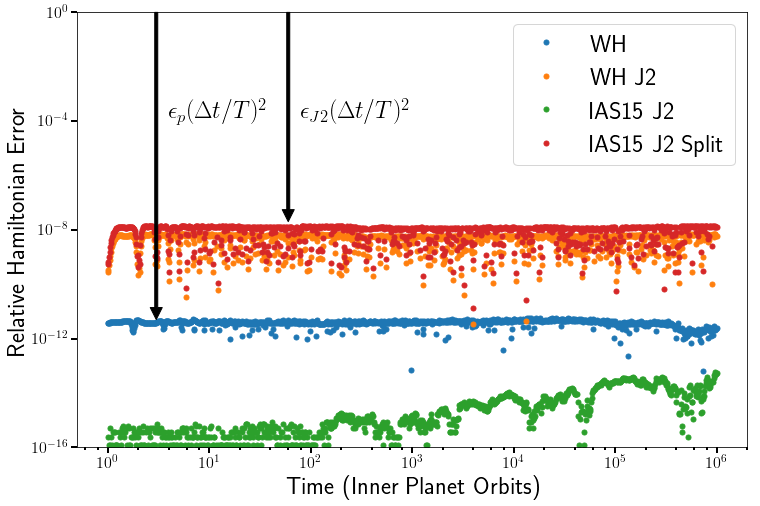

In [186]:
epsilon_p = 1.e-8
epsilon_J2 = 1.e-4
dtOverT = 0.01

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(times, Es, '.', label='WH')
ax.plot(times, EsJ2, '.', label='WH J2')
ax.plot(times, EsJ2IAS15, '.', label='IAS15 J2')
ax.plot(times, EsJ2IAS15Split, '.', label='IAS15 J2 Split')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.])

plt.rcParams["text.usetex"] =True
plt.locator_params(axis='y', numticks=5)
ax.annotate(s='', xy=(60, np.pi**2/6.*epsilon_p*dtOverT**2), xytext=(60, 1), arrowprops=dict(width=3, facecolor='black'))
ax.text(4, 1.e-4, r'$\epsilon_{p}(\Delta t/T)^2$', fontsize=24)

ax.annotate(s='', xy=(3, 5.e-12), xytext=(3, 1), arrowprops=dict(width=3, facecolor='black'))
ax.text(80, 1.e-4, r'$\epsilon_{J2}(\Delta t/T)^2$', fontsize=24)

ax.legend(fontsize=24)
ax.set_xlabel('Time (Inner Planet Orbits)', fontsize=24)
ax.set_ylabel('Relative Hamiltonian Error', fontsize=24)

fig.savefig("fig1.pdf", bbox_inches='tight')

In [126]:
simIAS = rebound.Simulation()
simIAS.add(m=1.)
simIAS.add(m=Mp, P=1., e=0.1)
simIAS.add(m=Mp, P=2.3, e=0.1)
simIAS.move_to_com()

E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)

rebxIAS = reboundx.Extras(simIAS)
rebxIAS.add("gravitational_harmonics")
ps = simIAS.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a

EsJ2 = np.zeros(Nout)
a = np.zeros(Nout)
times = np.logspace(0, 4, Nout)
a0 = sim.particles[1].a

for i, time in enumerate(times):
    sim.integrate(time)
    simIAS.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2[i] = np.abs((E-E0)/E0)
    phaseerr[i] = np.abs(sim.particles[1].f-simIAS.particles[1].f)/(2*np.pi)
    a[i] = np.abs((sim.particles[1].a-a0)/a0)

In [108]:
Mp = 1.e-6
Nout = 1000

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1., e=0.1)
sim.add(m=Mp, P=2.3, e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = 0.01*sim.particles[1].P

simIAS = rebound.Simulation()
simIAS.add(m=1.)
simIAS.add(m=Mp, P=1., e=0.1)
simIAS.add(m=Mp, P=2.3, e=0.1)
simIAS.move_to_com()

E0 = sim.calculate_energy()
Es = np.zeros(Nout)
phaseerr = np.zeros(Nout)
times = np.logspace(0, 4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    simIAS.integrate(time)
    E = sim.calculate_energy()
    Es[i] = np.abs((E-E0)/E0)
    phaseerr[i] = np.abs(sim.particles[1].f-simIAS.particles[1].f)/(2*np.pi)

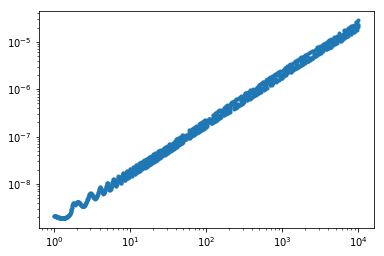

In [109]:
fig, ax = plt.subplots()
ax.plot(times, phaseerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

(1e-16, 1e-06)

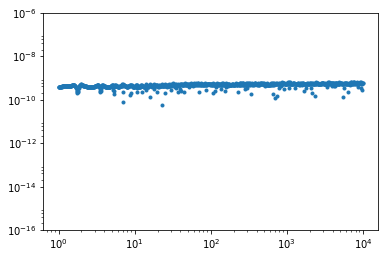

In [110]:
fig, ax = plt.subplots()
ax.plot(times, Es, '.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.e-6])

In [126]:
Mp = 1.e-7
Nout = 1000
J2 = 1.e-3

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1., e=0.1)
sim.add(m=Mp, P=2.3, e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = 0.01*sim.particles[1].P

simIAS = rebound.Simulation()
simIAS.add(m=1.)
simIAS.add(m=Mp, P=1., e=0.1)
simIAS.add(m=Mp, P=2.3, e=0.1)
simIAS.move_to_com()

rebx = reboundx.Extras(sim)
rebx.add("gravitational_harmonics")
ps = sim.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)

rebxIAS = reboundx.Extras(simIAS)
rebxIAS.add("gravitational_harmonics")
ps = simIAS.particles
ps[0].params['J2'] = J2
ps[0].params['R_eq'] = ps[1].a

EsJ2 = np.zeros(Nout)
a = np.zeros(Nout)
times = np.logspace(0, 4, Nout)
a0 = sim.particles[1].a

for i, time in enumerate(times):
    sim.integrate(time)
    simIAS.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2[i] = np.abs((E-E0)/E0)
    phaseerr[i] = np.abs(sim.particles[1].f-simIAS.particles[1].f)/(2*np.pi)
    a[i] = np.abs((sim.particles[1].a-a0)/a0)

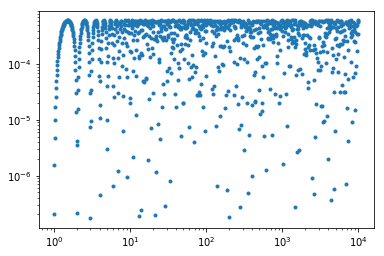

In [127]:
fig, ax = plt.subplots()
ax.plot(times, a, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

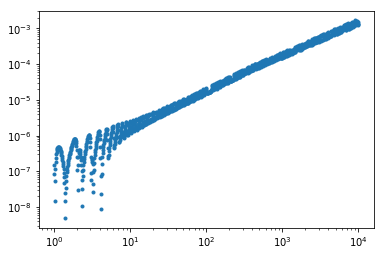

In [128]:
fig, ax = plt.subplots()
ax.plot(times, phaseerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

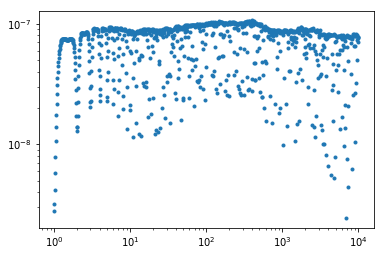

In [129]:
fig, ax = plt.subplots()
ax.plot(times, EsJ2, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-8])

In [61]:
Mp = 1.e-7
Nout = 1000

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1.)
sim.add(m=Mp, P=2.3)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = sim.particles[1].P/100

rebx = reboundx.Extras(sim)
rebx.add("gravitational_harmonics")
#gr = rebx.add('gr_potential')
#gr.params['c'] = 1.e2
ps = sim.particles
ps[0].params['J2'] = 1.e-1
ps[0].params['R_eq'] = ps[1].a
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
#E0 = sim.calculate_energy() + rebx.gr_potential_hamiltonian(sim, gr)


EsJ2 = np.zeros(Nout)
times = np.logspace(0, 4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    #E = sim.calculate_energy() + rebx.gr_potential_hamiltonian(sim, gr)

    EsJ2[i] = np.abs((E-E0)/E0)

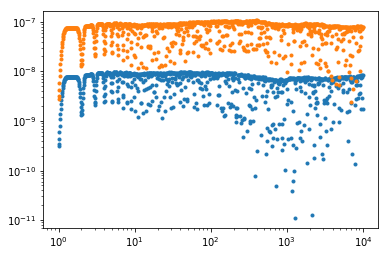

In [130]:
fig, ax = plt.subplots()
ax.plot(times, Es, '.')
ax.plot(times, EsJ2, '.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([1.e-16, 1.e-6])

In [24]:
Mp = 1.e-7
Nout = 1000

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=Mp, P=1.)
sim.add(m=Mp, P=2.3)
sim.move_to_com()

rebx = reboundx.Extras(sim)
rebx.add("gravitational_harmonics")
ps = sim.particles
ps[0].params['J2'] = 1.e-4
ps[0].params['R_eq'] = 1.
E0 = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)

EsJ2IAS15 = np.zeros(Nout)
times = np.logspace(0, 4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    E = sim.calculate_energy() + rebx.gravitational_harmonics_hamiltonian(sim)
    EsJ2IAS15[i] = np.abs((E-E0)/E0)

(1e-16, 1e-06)

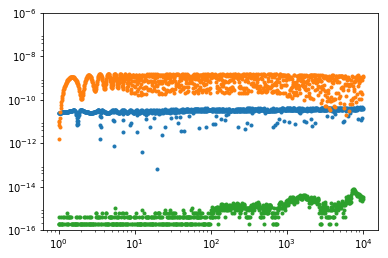

In [25]:
fig, ax = plt.subplots()
ax.plot(times, Es, '.')
ax.plot(times, EsJ2, '.')
ax.plot(times, EsJ2IAS15, '.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1.e-16, 1.e-6])

In [14]:
ps[1].a

0.293687029488642